# Astronomical Telescopes and Instruments 2020: Exercise Set 3

Welcome to the third exercise class for ATI 2020. You have to hand in the completed notebook to Brightspace before the start of the next lecture. Information/things to think about will be in regular font, while exercises will be *italic*.

### Make sure your submitted notebook works when run from scratch! You can do this using the menu above 'Kernel/Restart & Run all'. There should be no errors!

*Upload the finished notebook to Brightspace before the start of the next lecture!*

These are the packages you need for this exercise set. You are welcome to add extra, but this should not be necessary.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import hcipy as hp
from scipy import special

%matplotlib inline

Note that you must have *hcipy* installed to be able to do the second exercise. This should be pretty straightforward using 'python -m pip install hcipy' or using one of the ways described at https://docs.hcipy.org/0.3.1/installation.html.

### Exercise 1: Double Pinhole Interferometer

In this exercise we will look at some properties of the double pinhole interferometer. First we assume the ideal case of a single monochromatic incoming plane wave, which we will later relax to a set of incoming plane waves. For this entire exercise we will assume the pinhole diameters are small compared to all other scales in the problem and that we are in the far-field (Fraunhofer approximation), so we can approximate that each pinhole creates a perfect spherical wave.

The setup for the double pinhole we will be considering looks like this:

![You should see an image of the double pinhole setup here. If you don't, take a look at images/ex1_setup.png ](images/ex1_setup.png)

The pinholes are indicated by the white dots, and the light rays go from left to right. Here $d$ is the distance between the pinholes, $\alpha$ ($\theta$) the angle with the normal for the incoming (outgoing) plane wave, and $L_{2}$ ($L_1$) the path length difference between the two rays for the incoming (outgoing) plane wave. Furthermore we have the wavelength of the (monochromatic) incoming light $\lambda$.

We will assume the pinholes are illuminated by a distant point source and set $I(0)=I_0$.
Under these assumptions we find the following angular intensity distribution $I(\theta)/I_0$:

In [5]:
def double_pinhole_throughput(theta, alpha, d, lam):
    '''
    Returns the throughput (output intensity relative to maximum output 
    intensity) for the idealized double pinhole interferometer with a 
    single plane wave as input.
    
    Parameters
    ----------
    theta : scalar/ndarray
        Output angle(s) to calculate the throughput at (in radians).
    alpha : scalar
        Angle of the incoming plane wave in radians.
    d : scalar
        Distance between the pinholes.
    lam : scalar
        Wavelength of the incoming plane wave.
    
    Returns
    -------
    T : scalar/ndarray
        Throughput I(theta)/I_0 calculated at the given output angles.
        Is of the same type as theta, and if an ndarray, has the same
        shape as theta.
    '''
    T = np.cos(np.pi*(np.sin(theta)-np.sin(alpha))*d/lam)**2
    return T

*Give the derivation leading to the above form for $I(\theta)/I_0$.*

Hint: remember the superposition principle and note that the two outgoing rays have a phase shift between them. This phase shift depends on both $L_2$ and $L_1$.

![](fig_3.1.1.jpeg)

We will now also assume we are in the paraxial limit, so $\theta\ll1$ and $\alpha\ll1$.

*What is the angular separation between adjacent fringe peaks?*

![](fig_3.1.2.jpeg)

Something to think about: What happens to the fringe spacing when the paraxial approximation no longer holds?

Now we will look at what happens when we relax some of our initial assumptions. First we will look at happens if the incoming beam is no longer monochromatic.

For definiteness take $\alpha=0$, $\lambda_0=0.5$ $\mu$m, and $d=20\lambda_0$. 

*Plot $I(\theta)/I_0$ against $\theta$ for polychromatic sets of plane waves with relative bandwidths $\Delta\lambda/\lambda_0$ of $0$, $0.05$, $0.2$, and $1$. Normalize each $I(\theta)$ to the same norm and plot them in the same figure. Pick a range for $\theta$ that you think showcases the change in behaviour as the bandwidth changes.*

Hint: create an array sampling the required wavelength range (make sure your sampling is high enough), and sum the resulting $I(\theta)$'s

/home/auke/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in true_divide
/home/auke/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in cos


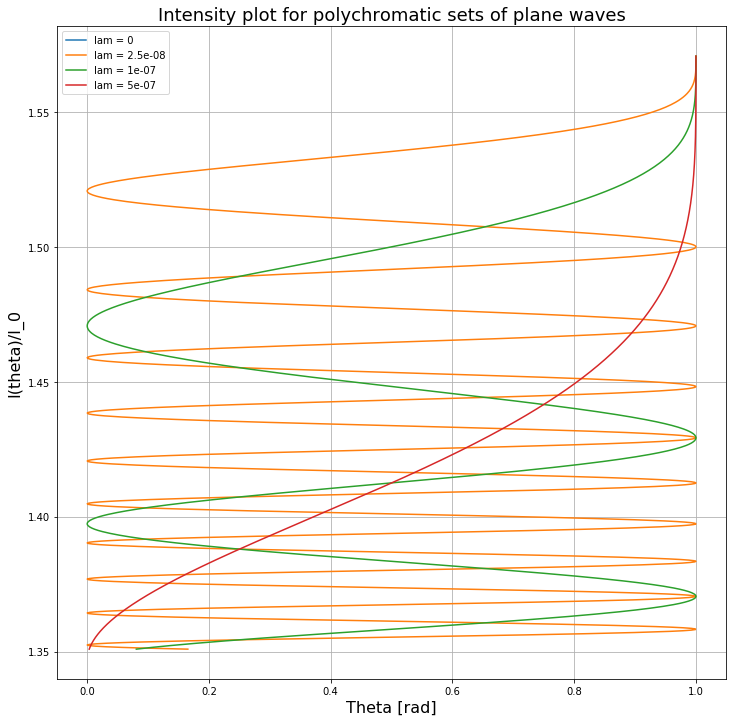

In [25]:
alpha = 0
lam_0 = 0.5e-6
d = 20*lam_0
lam = [0, lam_0/20, lam_0/5, lam_0]
theta_arr = np.linspace(0.43*np.pi, 0.5*np.pi, 1000)

plt.figure(figsize=(12,12))

for i in lam:
    T = double_pinhole_throughput(theta_arr, alpha, d, i)
    plt.plot(T, theta_arr, label=f'lam = {i}')

plt.title('Intensity plot for polychromatic sets of plane waves', fontsize=18)
plt.xlabel('Theta [rad]', fontsize=16)
plt.ylabel('I(theta)/I_0', fontsize=16)

plt.grid()
plt.legend()
plt.show()
plt.close()

Try to understand what causes the above pattern. If it helps, you can plot several instances of monochromatic $I(\theta)/I_0$, each with a different wavelength.

Next we will look at something with a finite angular size. In this case there will be a set of plane waves where each plane wave will have a different $\alpha$. Take the same $\lambda_0$ and $d$ as above and set $\lambda=\lambda_0$. We will assume we have a narrowband filter so we don't have to worry about finite bandwidth effects.

*Plot $I(\theta)/I_0$ against $\theta$ for sets of plane waves with a $\Delta\alpha$ of $0$ $\lambda_0/d$, 0.5 $\lambda_0/d$, 1.0 $\lambda_0/d$, 3.5 $\lambda_0/d$. Normalize each $I(\theta)$ to the same norm and plot them in the same figure. Pick a range for $\theta$ that you think showcases the change in behaviour as $\Delta\alpha$ changes.* 



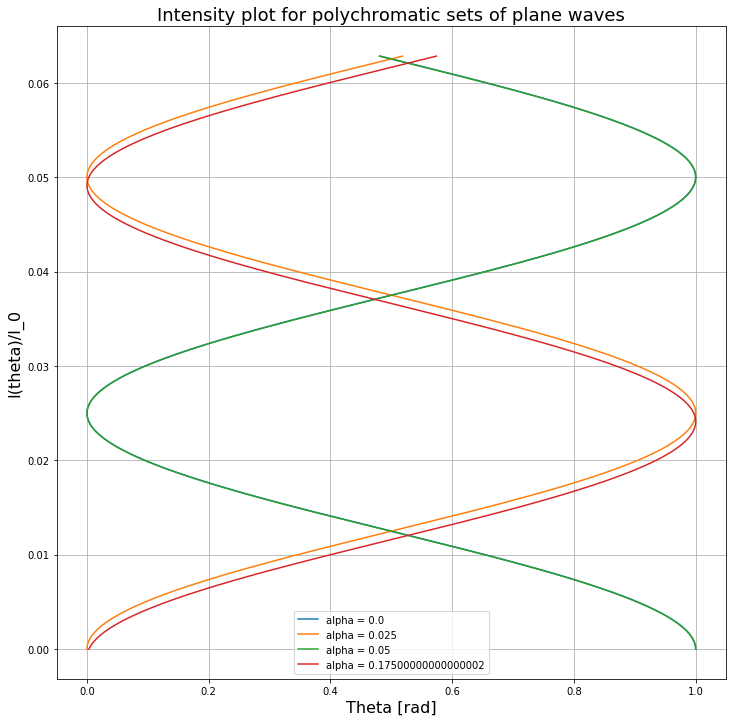

In [41]:
lam_0 = 0.5e-6
d = 20*lam_0
lam = lam_0
alpha_arr = [0*lam_0/d, 0.5*lam_0/d, 1*lam_0/d, 3.5*lam_0/d]
theta_arr = np.linspace(0*np.pi, 0.1*np.pi/5, 1000)

plt.figure(figsize=(12,12))

for i in alpha_arr:
    T = double_pinhole_throughput(theta_arr, i, d, lam)
    plt.plot(T, theta_arr, label=f'alpha = {i}')

plt.title('Intensity plot for polychromatic sets of plane waves', fontsize=18)
plt.xlabel('Theta [rad]', fontsize=16)
plt.ylabel('I(theta)/I_0', fontsize=16)

plt.grid()
plt.legend()
plt.show()
plt.close()

Again, try to understand what causes the above results. 

Finally we will look at what happens when we use a double pinhole interferometer to look at the Sun.

The Sun is $1.5\cdot10^8$ km away and is $1.4\cdot10^6$ km in diameter. Assume we are looking at the Sun using a narrowband filter with the same $\lambda_0$ as above.

*How close do the pinholes have to be before you see fringes with the Sun?*


![](fig_3.1.5.jpeg)

### Exercise 2: Far-field Diffraction Pattern of a Circular Aperture

In this exercise we will take a detailed look at the far-field (Fraunhofer regime) diffraction pattern of a circular aperture. Most telescopes will have a (approximately) circular aperture, typically with a central obscuration. In this exercise we ignore the central obscuration.

This exercise will make use of *hcipy*, a Python package developed here in Leiden. You are encouraged to take a quick look around the source code for possible functions (https://github.com/ehpor/hcipy/tree/master/hcipy) and the documentation (https://docs.hcipy.org/0.3.1/). Specifically take a look at https://docs.hcipy.org/0.3.1/getting_started/1_coordinates_grids_fields.html. We will be using *hcipy* in future exercise sets as well.

![You should see an image with the pupil and focal plane here. If you don't, take a look at images/ex2_setup.png.](images/ex2_setup.png)

#### Pupil planes and focal planes

Before getting into the code, we will define the 'pupil plane' and 'focal plane'. These are central concepts when working with *hcipy* and physical optics. Simply put, these planes are areas normal to the optical axis of the optical system where images are in focus. Outside these planes the in focus images are diffracted slightly, which makes them out of focus or completely unrecognizable (think back to the Fresnel propagated circular aperture from the lecture). 

'Pupil plane' refers to the plane where we typically define a pupil with an aperture. This is where the light beam is collimated (light rays going parallel). 'Focal plane' refers to the plane at the focus of a lens. Because a lens images the image at infinity at its focus, the image in the focal plane is the far-field diffracted image of the pupil plane. As covered in the lecture, far-field diffraction corresponds to a Fourier transform, so the pupil plane image and focal plane image are Fourier conjugated.

To summarize: the pupil and focal planes are connected by a Fourier transform and are the planes where an image is in focus.

#### An example: Far-field Diffraction Pattern of a Square Aperture

To make working with *hcipy* a bit easier, we're going to take a look at a simple simulation which is almost the topic of this exercise, namely the far-field diffraction pattern of a square aperture, rather than a circular aperture.

We start by defining the physical parameters of the simulation. These are subdivided into properties relevant for the pupil plane, properties relevant for the focal plane, and properties relevant for both planes.

In [42]:
# system properties
wavelength = 1       # wavelength of the wavefront we look at
f = 1                # focal length of the lens we look at

# pupil grid properties
D = 1                # diameter of the pupil
N = 512              # pixels along one axis of the pupil grid
grid_oversize = 1.1  # multiplicative factor making the grid larger than the aperture

# focal grid properties
ld_samples = 16      # pixels per lambda/D
ld_range = 8         # how many lambda/D will be included in the grid

Next we make the grids on which we will evaluate our wavefronts. These are the coordinates $x,y$ on which a function can be defined.

It is worthwhile to think about units for these $x,y$ coordinates. For the pupil plane we can think in terms of $D$, the diameter of the aperture we're going to define. For the focal plane, remember that in the Fraunhofer regime a typical angular scale is $\lambda/D$. Angles are converted to a position in the focal plane (in the paraxial limit) by $x_{\text{focal}}=f\theta$ for an angle $\theta$ and focal length $f$. Useful units in the focal plane will therefore be $f\lambda/D$. 

Note that both $D$ and $f\lambda/D$ are $1$ with the parameters above, so our grids are naturally scaled to these units.

In [43]:
ld_physical_scale = f * wavelength / D # physical distance corresponding to 1 lambda/D

# build the grids
pupil_grid = hp.make_pupil_grid(N, D * grid_oversize)
focal_grid = hp.make_focal_grid(ld_samples, ld_range, ld_physical_scale)

With our grids defined, we can create objects defining wavefronts and objects which perform operations on wavefronts.

We will start by creating an aperture generator. This is a function which takes as input a grid and returns a *Field* object. The Field is the basic data structure in *hcipy*. It is simply a *numpy* array with a grid attached to it. This means that for every $x,y$ in the grid we now have an associated array value. A Field being a class derived from a *numpy* array means that all the attributes and methods of a *numpy* array can also be used on a Field (such as '.shape', '.max()', etc.).
In our case, the aperture generator will create an array based on the coordinates in the grid. All $|x|,|y| < D/2$ will get an value of $1$ associated with them, and the rest will be $0$.

Be careful when accessing the data in a Field directly, because it is stored in a flattened array (as are the $x,y$ values in a grid). To get the 'usual' *numpy* array out, use the '.shaped' attribute of a Field.

In [44]:
aperture_generator = hp.rectangular_aperture(D)

# hp.rectangular_aperture(D) is not yet a Field!
print("Aperture generator is of type: {0}".format(type(aperture_generator)))

# this gives the Field
pupil_electric_field = aperture_generator(pupil_grid)

# the data is stored in a flattened numpy array
print("\nThe field data has shape {0}".format(pupil_electric_field.shape))
print("The shaped field data has shape {0}".format(pupil_electric_field.shaped.shape))

Aperture generator is of type: <class 'function'>

The field data has shape (262144,)
The shaped field data has shape (512, 512)


Now that we have an aperture Field, we can turn it into a wavefront. This is done by the *Wavefront* class. The Wavefront gives direct access to a number of relevant parameters of a wavefront. The one we will use in this simulation is the '.intensity' method, which gives the electric field norm squared.

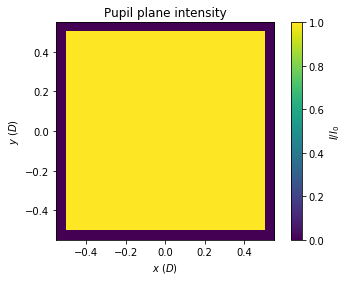

In [45]:
pupil_wavefront = hp.Wavefront(pupil_electric_field, wavelength)

I_pupil = pupil_wavefront.intensity # Field with intensity values

# some useful plotting code
plt.figure()
hp.imshow_field(I_pupil/I_pupil.max(), grid_units = D)
plt.xlabel(r'$x$ ($D$)')
plt.ylabel(r'$y$ ($D$)')
plt.colorbar(label = r'$I/I_0$')
plt.title("Pupil plane intensity")

plt.show()

The next step is to create an object which can propagate our wavefront from the pupil plane to a focal plane. This can be done using the *FraunhoferPropagator*. This is the first example of an optical element, which is a class of objects that alter a wavefront. Other examples of optical elements implemented in *hcipy* are (don't worry if you don't recognize all the terms) apodizers, fibers, micro-lens arrays, or various coronagraphs (and much more). These all require some parameters to create, and all have a '.forward' method that can propagate a wavefront through them.

In the case of the FraunhoferPropagator, we need to let it know what grids we're using in the pupil and focal plane, and the focal length of the lens used to image the focal plane (whose default is set to 1). When we use the '.forward' method we input our pupil plane wavefront and get back a focal plane wavefront (with the focal grid attached).

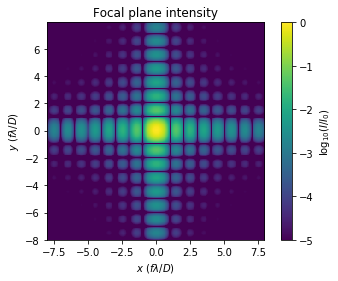

In [46]:
# create optical element
fraun = hp.FraunhoferPropagator(pupil_grid, focal_grid, f)

# use the optical element
focal_wavefront = fraun.forward(pupil_wavefront)

I_focal = focal_wavefront.intensity

# plot focal plane intensity
plt.figure()
hp.imshow_field(np.log10(I_focal/I_focal.max()), grid_units = f*wavelength/D, vmin=-5)
plt.colorbar(label=r"log$_{10}(I/I_0)$")
plt.xlabel(r"$x$ ($f\lambda/D$)")
plt.ylabel(r"$y$ ($f\lambda/D$)")
plt.title("Focal plane intensity")

plt.show()

As you can see this reproduces the expected $(\text{sinc}{(ax)}\text{sinc}{(ay)})^2$ pattern for far-field diffraction from a square aperture.

#### Circular aperture

Now you get to redo this simulation with a circular aperture.

*Plot the logarithm of the far-field diffraction pattern of a circular aperture with diameter $D$. Normalize the image so the peak power is 1.*

Hint: take a look at *circular_aperture* in *hcipy*.

Aperture generator is of type: <class 'function'>

The field data has shape (262144,)
The shaped field data has shape (512, 512)


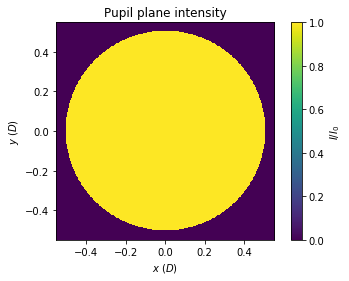

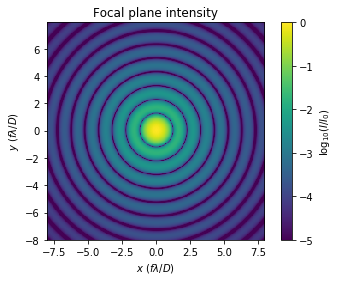

In [54]:
aperture_generator = hp.circular_aperture(D) # I changed this to circular.

# hp.rectangular_aperture(D) is not yet a Field!
print("Aperture generator is of type: {0}".format(type(aperture_generator)))

# this gives the Field
pupil_electric_field = aperture_generator(pupil_grid)

# the data is stored in a flattened numpy array
print("\nThe field data has shape {0}".format(pupil_electric_field.shape))
print("The shaped field data has shape {0}".format(pupil_electric_field.shaped.shape))

pupil_wavefront = hp.Wavefront(pupil_electric_field, wavelength)

I_pupil = pupil_wavefront.intensity # Field with intensity values

# some useful plotting code
plt.figure()
hp.imshow_field(I_pupil/I_pupil.max(), grid_units = D)
plt.xlabel(r'$x$ ($D$)')
plt.ylabel(r'$y$ ($D$)')
plt.colorbar(label = r'$I/I_0$')
plt.title("Pupil plane intensity")

plt.show()
plt.close()

# create optical element
fraun = hp.FraunhoferPropagator(pupil_grid, focal_grid, f)

# use the optical element
focal_wavefront = fraun.forward(pupil_wavefront)

I_focal = focal_wavefront.intensity

# plot focal plane intensity
plt.figure()
hp.imshow_field(np.log10(I_focal/I_focal.max()), grid_units = f*wavelength/D, vmin=-5)
plt.colorbar(label=r"log$_{10}(I/I_0)$")
plt.xlabel(r"$x$ ($f\lambda/D$)")
plt.ylabel(r"$y$ ($f\lambda/D$)")
plt.title("Focal plane intensity")

plt.show()
plt.close()

The analytical form for the Airy pattern you generated above is given by $I(\theta)/I_0 = (2J_1(u)/u)^2$, with $u = \pi \theta D/\lambda$ in the paraxial case. The $J_1$ is a 1st order Bessel function of the first kind, which acts as the replacement for the sine you would expect if we had a square aperture. This function is implemented in *scipy* as *scipy.special.jv*.

In [ ]:
def analytical_airy_pattern(theta, D, wavelength):
    '''
    Calculate the normalized intensity of an Airy pattern
    at the specified angles.
    
    Parameters
    ----------
    theta : ndarray
        Angles to calculate the intensity at.
    D : scalar
        Diameter of the circular aperture in the pupil plane.
    wavelength : scalar
        Wavelength of the light.
    
    Returns
    -------
    I : ndarray
        Values of the Airy pattern at the specified angles.
        Has the same shape as theta.
    '''
    u = np.array(np.pi*theta*D/wavelength)
    
    I = np.zeros(u.shape)
    m = u != 0
    
    I[~m] = 1
    I[m] = (2*special.jv(1,u[m])/u[m])**2
    
    return I

*Make a plot with logarithmic y-axis where you compare the following three functions:*

1. *A (normalized) slice through the middle of the numerically calculated Airy pattern.*
2. *The (appropriately scaled) analytical Airy pattern.*
3. *The diffraction pattern for a slit of diameter $D$ (whose expression you can find in the lecture slides).*

Two notes:

As mentioned above: Behind the scenes *hcipy* stores the data in any Field object as a flattened array. To get the 2d array with intensity values you can use the '.shaped' attribute of a Field object.

You can get the $x$ ($y$) values from the focal grid with the '.x' ('.y') method for grids. These are however for the full grid, and there are multiple points with the same $x$ ($y$). You can use *np.unique* to get the unique $x$ ($y$) values. As to what grid you have to use, you can access the grid of a Field or Wavefront using the '.grid' attribute.

In [ ]:
# Your code goes here ...

If you've done everything correctly, the numerical and analytical Airy pattern must of course overlap.

Take a look at the differences between the Airy pattern and the slit diffraction pattern. A major difference you may see is that the Airy pattern fringes die away quite quickly when compared to the slit diffraction pattern. This is what we will look at next.

#### Airy pattern fringes

As $\theta$ increases, we can approximate $J_1(u)$ with $\sqrt{2/(\pi u)} \cos{(u-3\pi/4)}$ (specifically, this approximation holds when $u\gg 3/4$, see https://mathworld.wolfram.com/BesselFunctionoftheFirstKind.html). You are encouraged to check this by plotting both functions and comparing them. From this approximation, we can estimate what the relative intensity of the $k$-th fringe is.

*Derive that the intensity of the $k$-th fringe of an Airy pattern scales with $k^{-3}$ when $k\gg1$.*

Hint: You can ignore the $\sqrt{2/(\pi u)}$ when calculating the approximate maxima, so you only have to get the extrema for $\cos{(u-3\pi/4)}$.

**Your derivation goes here.**

Note that the $k$-th fringe of a $\text{sinc}^2$ pattern will scale with $k^{-2}$, in line with the observation that the $\text{sinc}^2$ fringes die away more slowly than the Airy pattern fringes.

Playing around with the numerical constant, you may find that $I_0 k^{-3}/20$ is a pretty good approximation for the intensity of the $k$-th fringe. This has implications for looking at objects close to a diffracted point source, such as exoplanets.

*If we are looking for an exoplanet which has an expected intensity of $10^{-9} I_0$, how far away must that exoplanet be from the star (in $\lambda/D$) so that the Airy rings from the star are less bright than the exoplanet?*

** Your derivation goes here **

A relative intensity of $10^{-9}$ between star and planet is expected for rocky Earth-like planets. For these planets to be in the habitable zone around their star they can typically only be a few $\lambda/D$ from their star. Their signal is therefore completely overpowered by diffracted stellar light. This drives the need for coronagraphy and advanced data reduction techniques to find exoplanets (which is covered in the 'High Contrast Imaging' course).

### Make sure your submitted notebook works when run from scratch! You can do this using the menu above 'Kernel/Restart & Run all'. There should be no errors!

*Upload the finished notebook to Brightspace before the start of the next lecture!*